In [9]:
from geopy.geocoders import Nominatim
import pandas as pd

# Baca dataset CSV
data = pd.read_csv('kemacetan_tanpa_nan.csv')

# Inisialisasi geolocator
geolocator = Nominatim(user_agent="macet")

# Fungsi untuk mendapatkan koordinat dari lokasi
def get_coordinates(row):
    location = geolocator.geocode(row['lokasi'])
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Tambah kolom latitude dan longitude ke dalam dataset
data['Latitude'], data['Longitude'] = zip(*data.apply(get_coordinates, axis=1))

# Simpan dataset yang telah diperbarui
data.to_csv('lat-long-kemacetan.csv', index=False)


In [8]:
df = pd.read_csv('kemacetan_tanpa_nan.csv')
df

,wilayah,lokasi,jenis_kendaraan,keterangan
0,Jakarta Pusat,Jl. Gatot Subroto,Bus AKAP,Terminal Bayangan
1,Jakarta Pusat,Jl. Kebon Jati Tn. Abang,Mobil Barang,Bongkar Muat Angkutan Barang
2,Jakarta Pusat,Jl. Jati Baru Tn. Abang,Mobil Barang,Bongkar Muat Angkutan Barang
3,Jakarta Pusat,Jl. KH. Mas Mansyur Tn. Abang,Mobil Barang,Bongkar Muat Angkutan Barang
4,Jakarta Pusat,Jl. Wahid Hasyim,Mobil Barang,Bongkar Muat Angkutan Barang
5,Jakarta Pusat,Jl. Samanhudi,Kendaraan Pribadi,Pengunjung Belanja Ps. Baru
6,Jakarta Pusat,Jl. Abdul Muis,Kendaraan Pribadi,Tamu dari Dephub
7,Jakarta Pusat,Jl. Kramat Raya,Kendaraan Pribadi,Pengunjung Belanja Ps. Kenari
8,Jakarta Pusat,Jl. Poncol,Kendaraan Pribadi,Tanpa Lahan Parkir
9,Jakarta Pusat,"Jl. Soeprapto - Cempaka I,II dan III",Kendaraan Material,0


In [10]:
import pandas as pd
import geopandas as gpd

geo_df = pd.read_csv('lat-long-kemacetan.csv')
geo_convert = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['Longitude'], geo_df['Latitude']))
geo_convert.head()

,wilayah,lokasi,jenis_kendaraan,keterangan,Latitude,Longitude,geometry
0,Jakarta Pusat,Jl. Gatot Subroto,Bus AKAP,Terminal Bayangan,-8.360343,114.622628,POINT (114.62263 -8.36034)
1,Jakarta Pusat,Jl. Kebon Jati Tn. Abang,Mobil Barang,Bongkar Muat Angkutan Barang,NaN,NaN,POINT EMPTY
2,Jakarta Pusat,Jl. Jati Baru Tn. Abang,Mobil Barang,Bongkar Muat Angkutan Barang,NaN,NaN,POINT EMPTY
3,Jakarta Pusat,Jl. KH. Mas Mansyur Tn. Abang,Mobil Barang,Bongkar Muat Angkutan Barang,NaN,NaN,POINT EMPTY
4,Jakarta Pusat,Jl. Wahid Hasyim,Mobil Barang,Bongkar Muat Angkutan Barang,-6.929862,107.597345,POINT (107.59735 -6.92986)


In [7]:
import pandas as pd
import numpy as np

# Baca dataset CSV
data = pd.read_csv('titik-rawan-kemacetan.csv')

# Ganti nilai NaN dengan nilai lain, misalnya 0
data.fillna(0, inplace=True)

# Simpan dataset yang telah diperbarui
data.to_csv('kemacetan_tanpa_nan.csv', index=False)


<Axes: >

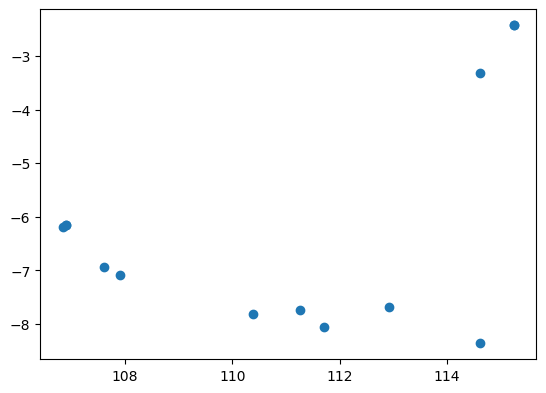

In [11]:
geo_convert.plot()

<Axes: >

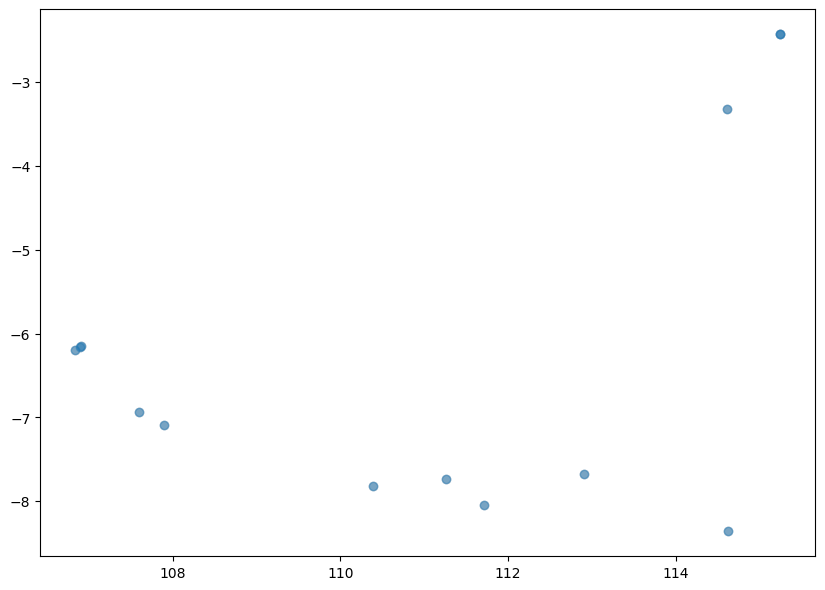

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
geo_convert.plot(ax=ax, color='lightgrey', zorder=1)
geo_convert.plot(ax=ax, alpha=0.5, zorder=2)

<ipython-input-13-90c70a881cf8>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

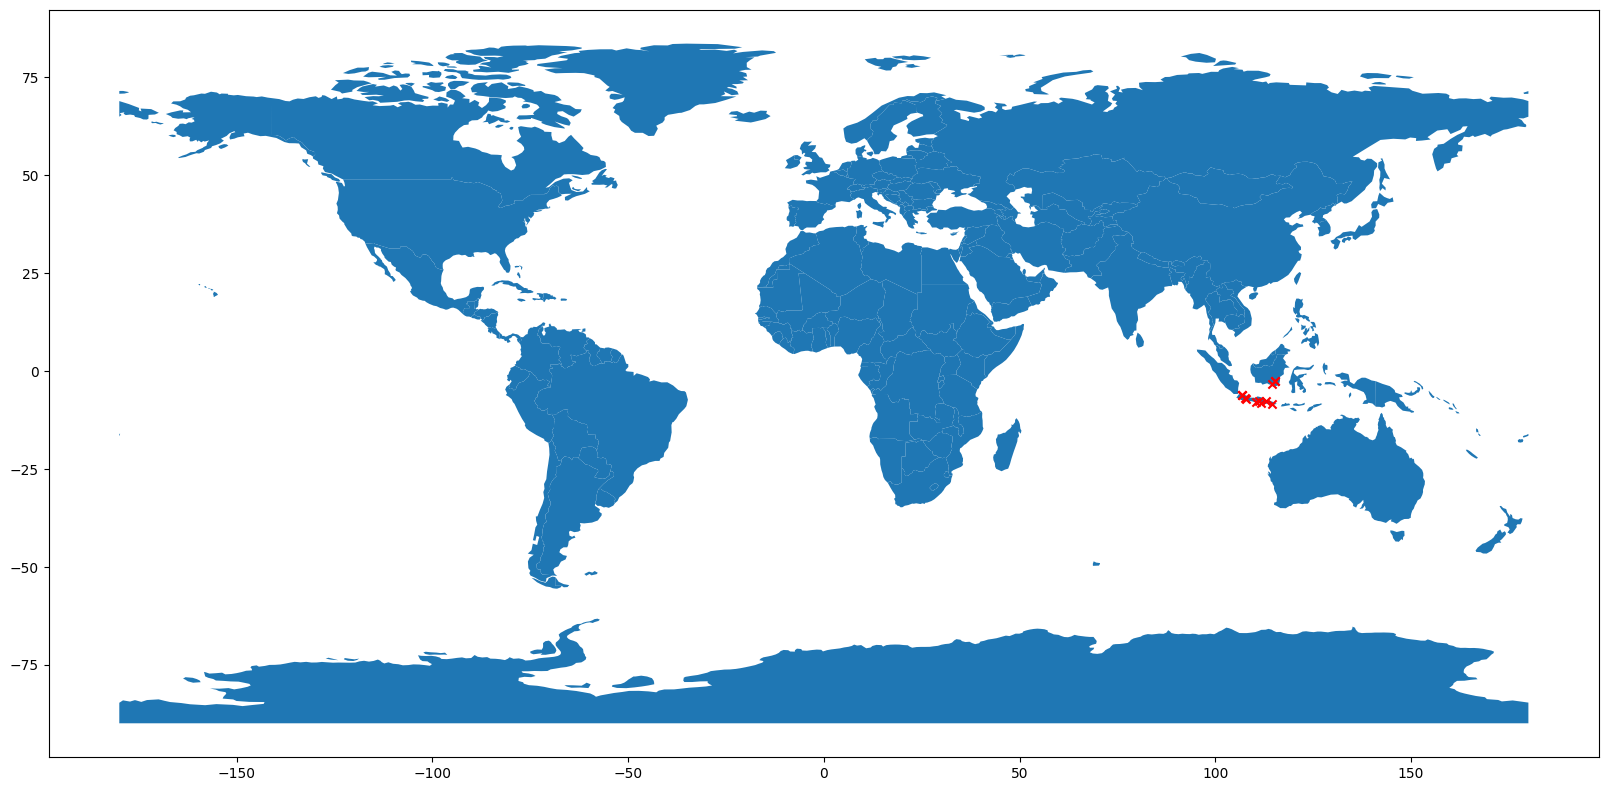

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_convert.plot(ax=world.plot(figsize=(20, 10)), marker='x', color='red', markersize=35)